<a href="https://colab.research.google.com/github/christophergaughan/sample-work/blob/master/Kaggle_dog_breed_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Breed Classification from Images Using TensorFlow
***This notebook builds an end-to-end multi-class image classifier from Tensorflow 2.0 and  TensorFlow Hub***

## 1. Problem

Identifying a breed of a dog given the image of a dog.

If I take a picture of a dog, can I use this program to identfy its breed??

## 2. Data

The data we're using comes from the Kaggle data set from the Dog Breed Identificstion Competitition: https://www.kaggle.com/c/dog-breed-identification

## 3. Evaluation

Classification (think of accuracy): Specifically the Kaggle competition was looking at "Mult-Class_Log_Loss"

L_{\log}(y, p) = -(y \log (p) + (1 - y) \log (1 - p))

For each image in the test set, you must predict a probability for each of the different breeds. The file should contain a header and have the following format:

> id,affenpinscher,afghan_hound,..,yorkshire_terrier
000621fb3cbb32d8935728e48679680e,0.0083,0.0,...,0.0083
etc.

So the evaluation is a file with prediction probabilities for each dog breed of each test image.

see:    
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:

* We're dealing with images (i.e. unstructured data). So it's probably best that we are using deep-learning/transfer learning
* 120 breeds of dogs (i.e. 120 different classes)
* There are 10222 unique values or training images (these images have labels) and 10358 images in the test set (i.e. images with NO LABELS b/c we'll want to predict them)





In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
ls -la


total 16
drwxr-xr-x 1 root root 4096 Nov 18 14:36 ./
drwxr-xr-x 1 root root 4096 Dec  1 02:22 ../
drwxr-xr-x 4 root root 4096 Nov 18 14:35 .config/
drwxr-xr-x 1 root root 4096 Nov 18 14:36 sample_data/


In [3]:
cd ../

/


In [4]:
ls -la


total 116
drwxr-xr-x   1 root root 4096 Dec  1 02:22 ./
drwxr-xr-x   1 root root 4096 Dec  1 02:22 ../
drwxr-xr-x   1 root root 4096 Nov 18 14:27 bin/
drwxr-xr-x   2 root root 4096 Apr 24  2018 boot/
drwxr-xr-x   1 root root 4096 Nov 18 14:36 content/
drwxr-xr-x   1 root root 4096 Nov 29 17:59 datalab/
drwxr-xr-x   6 root root  460 Dec  1 02:22 dev/
-rwxr-xr-x   1 root root    0 Dec  1 02:01 .dockerenv*
drwxr-xr-x   1 root root 4096 Dec  1 02:01 etc/
drwx------   5 root root 4096 Dec  1 02:22 gdrive/
drwxr-xr-x   2 root root 4096 Apr 24  2018 home/
drwxr-xr-x   1 root root 4096 Nov 18 14:28 lib/
drwxr-xr-x   2 root root 4096 Nov 18 14:15 lib32/
drwxr-xr-x   1 root root 4096 Nov 18 14:15 lib64/
drwxr-xr-x   2 root root 4096 Nov 19  2020 media/
drwxr-xr-x   2 root root 4096 Nov 19  2020 mnt/
drwxr-xr-x   1 root root 4096 Dec  1 02:01 opt/
dr-xr-xr-x 205 root root    0 Dec  1 02:01 proc/
drwxr-xr-x  14 root root 4096 Nov 18 14:29 python-apt/
drwx------   1 root root 4096 Dec  1 02:01 root

In [5]:
cd gdrive/

/gdrive


In [6]:
ls -ltr

total 4
drwx------ 15 root root 4096 Dec  1 02:22 MyDrive/


In [7]:
cd MyDrive/

/gdrive/MyDrive


In [8]:
ls -la


total 228341
-rw------- 1 root root   257215 Nov  7  2014 '2014-07-03 11.26.24.jpg'
-rw------- 1 root root  7462037 Jun 20  2017  321AA485-724B-4214-BC7B-E8397CD418E3-d94c3902-3536-4bc1-96e9-6d615b34a99b.mov
-rw------- 1 root root  9704223 Jun 20  2017  42D58BA5-132D-4A56-AD0B-28C9DDB71A7D-5fab10bb-a7a6-457a-a62e-1984b579937f.mov
-rw------- 1 root root  9609389 Jun 20  2017  42D58BA5-132D-4A56-AD0B-28C9DDB71A7D-8298803d-4113-4fc2-8224-d7029a51c504.mov
-rw------- 1 root root  8018612 Jun 20  2017  90DB1D42-9616-46D4-B8E9-807F9F779FEE-8298803d-4113-4fc2-8224-d7029a51c504.mov
-rw------- 1 root root  7926493 Jun 20  2017  90DB1D42-9616-46D4-B8E9-807F9F779FEE-d94c3902-3536-4bc1-96e9-6d615b34a99b.mov
-rw------- 1 root root      151 May 31  2010  AccountSetupInfo_Chris.gdoc
-rw------- 1 root root      162 Feb 20  2014 '~$ail this.docx'
-rw------- 1 root root   131115 Jul  4 03:03  Albany_avocado.ipynb
-rw------- 1 root root   189960 Oct 28 23:09 'Assay Design Take Home.pdf'
-rw------- 1 root 

In [9]:
cd UDEMY_Nerual_Networks_Deep_learning/

/gdrive/MyDrive/UDEMY_Nerual_Networks_Deep_learning


In [10]:
ls -la

total 1137
-rw------- 1 root root 289424 Feb 24  2021 'Copy of TF2.0 Loading Data.ipynb'
-rw------- 1 root root  55849 Feb 22  2021  daily-minimum-temperatures-in-me.csv
drwx------ 2 root root   4096 Nov 28 21:29  dog_test/
drwx------ 2 root root   4096 Nov 28 20:31  dog_train/
-rw------- 1 root root 298986 Dec  1 02:22  Kaggle-dog-breed-identification.ipynb
-rw------- 1 root root 482063 Nov 28 03:14  labels_Kaggle_dog.csv
-rw------- 1 root root  28023 Feb 19  2021  TF2.0Intro.ipynb


In [11]:
cd dog_test/

/gdrive/MyDrive/UDEMY_Nerual_Networks_Deep_learning/dog_test


In [12]:
cd ..

/gdrive/MyDrive/UDEMY_Nerual_Networks_Deep_learning


In [13]:
ls -la

total 1137
-rw------- 1 root root 289424 Feb 24  2021 'Copy of TF2.0 Loading Data.ipynb'
-rw------- 1 root root  55849 Feb 22  2021  daily-minimum-temperatures-in-me.csv
drwx------ 2 root root   4096 Nov 28 21:29  dog_test/
drwx------ 2 root root   4096 Nov 28 20:31  dog_train/
-rw------- 1 root root 298986 Dec  1 02:22  Kaggle-dog-breed-identification.ipynb
-rw------- 1 root root 482063 Nov 28 03:14  labels_Kaggle_dog.csv
-rw------- 1 root root  28023 Feb 19  2021  TF2.0Intro.ipynb


# Get our workspace ready
* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure we're using a GPU 

In [14]:
# Import necessary tools 
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version: ", tf.__version__)
print("TF_Hub Version: ", hub.__version__)

TF Version:  2.7.0
TF_Hub Version:  0.12.0


# 

In [15]:
# check for GPU availability
print("GPU", "available!" if tf.config.list_physical_devices("GPU") else "not available")

GPU available!


In [16]:
ls -la

total 1137
-rw------- 1 root root 289424 Feb 24  2021 'Copy of TF2.0 Loading Data.ipynb'
-rw------- 1 root root  55849 Feb 22  2021  daily-minimum-temperatures-in-me.csv
drwx------ 2 root root   4096 Nov 28 21:29  dog_test/
drwx------ 2 root root   4096 Nov 28 20:31  dog_train/
-rw------- 1 root root 298986 Dec  1 02:22  Kaggle-dog-breed-identification.ipynb
-rw------- 1 root root 482063 Nov 28 03:14  labels_Kaggle_dog.csv
-rw------- 1 root root  28023 Feb 19  2021  TF2.0Intro.ipynb


## Gettting our data ready (turning it into tensors)
With all machine learning models, our data has to be in numerical format. Turning our data into tensors (numerical format).

Let's start by accessing our data and checking the labels.

In [17]:
import pandas as pd
labels_csv = pd.read_csv("labels_Kaggle_dog.csv")

In [18]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [19]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,625ff10f472290f567bc57641c8409dc,scottish_deerhound
freq,1,126


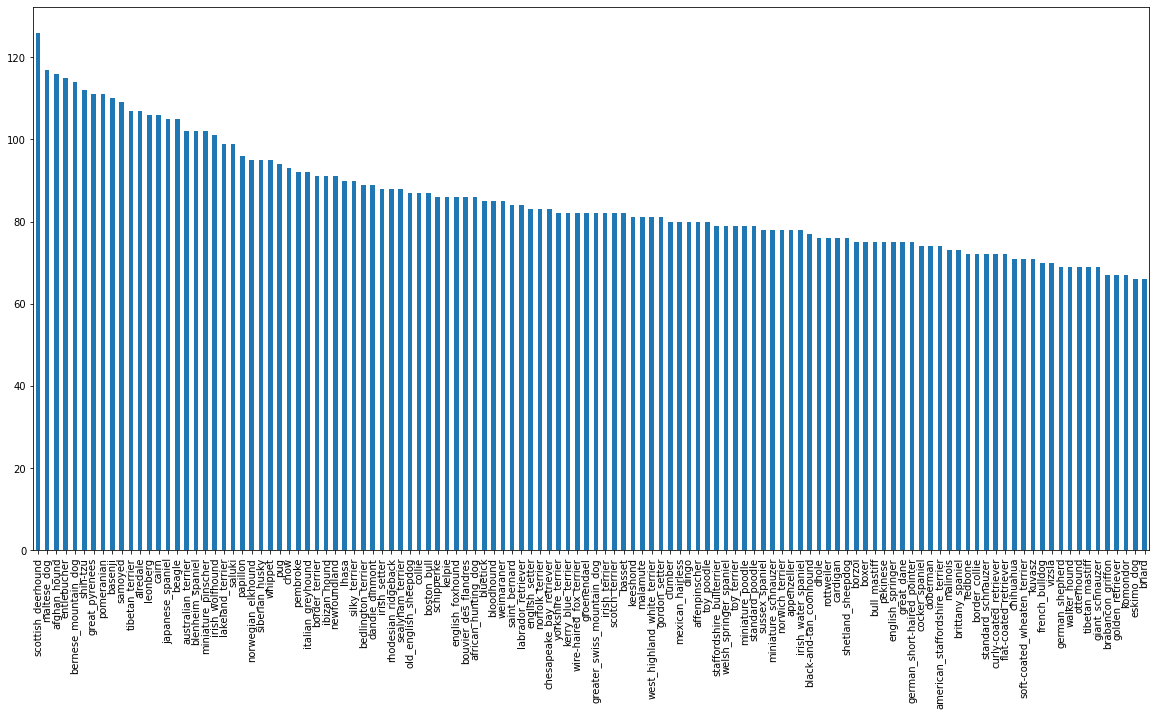

In [20]:
 # How many images are there of each breed
 labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [21]:
labels_csv["breed"].value_counts().median()

82.0

In [22]:
# Create pathnames from image ID's
filenames = ["dog_train/" + fname +".jpg" for fname in labels_csv["id"]]

# check the first 10
filenames[:10]

['dog_train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog_train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog_train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog_train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog_train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog_train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog_train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog_train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog_train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog_train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [23]:
len(filenames)

10222

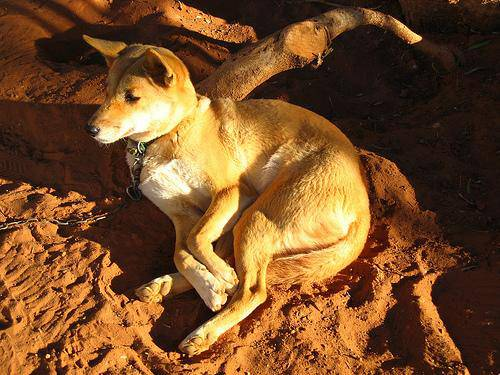

In [24]:
 # Let's view an image
 from IPython.display import Image
 Image("dog_train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [25]:
import os
if len(os.listdir("dog_train/")) == len(filenames):
    print("Filenames match actual amount of files. Proceed")
else:
    print("Filenames do not match actual amount of files. Check target directory")

Filenames do not match actual amount of files. Check target directory


### Getting Images and their labels

Let's get a list of all our image file pathnames

In [26]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [27]:
# Create pathnames from image ID's
filenames = ["dog_train/"+ fname+".jpg" for fname in labels_csv["id"]]

# Check the first ten
filenames[:10]

['dog_train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog_train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog_train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog_train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog_train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog_train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog_train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog_train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog_train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog_train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [28]:
len("dog_train/")

10

In [29]:
len(filenames)

10222

In [30]:
# Check whether number of files matches number of actual image files
import os
if len(os.listdir("dog_train/")) == len(filenames):
    print("filenames match actual amount of files. You may proceed with your useless life.")
else:
    print("Filenames do not match actual amount of files, check the target directory")

Filenames do not match actual amount of files, check the target directory


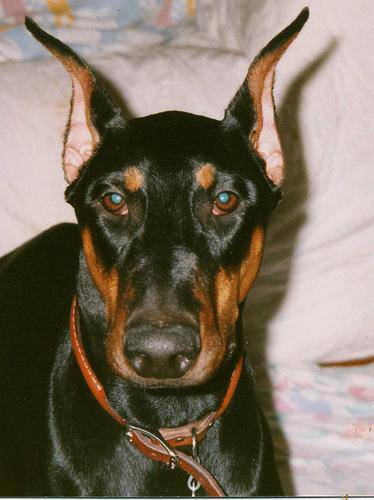

In [31]:
# One more check
Image(filenames[9001])

In [32]:
from IPython.display import Image
print(labels_csv["breed"][9001])


doberman


In [33]:
len(os.listdir("dog_train/"))

10242

## Now we must turn the labels into numbers
all the labels are in the form labels.csv


In [34]:
import numpy as np

labels = labels_csv["breed"].to_numpy()
# labels = np.array(labels) #does same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [35]:
len(labels)

10222

In [36]:
# See if number of labels matxhes the number of filenames
if len(labels) == len(filenames):
    print("Number of labels matches number of filenames")
else:
    print("Number of labels does not match number of filenames, check data directories")

Number of labels matches number of filenames


## Remember: Strings are not accepted in machine learning models. How do we find the unique labels??

In [37]:
# Find the unique labels
unique_breeds = np.unique(labels)
unique_breeds 

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [38]:
len(unique_breeds)

120

## How would we turn a single array into an array of booleans?

In [39]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

### Turn every label into a boolean array (seems computationally expenasive?)

In [40]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [41]:
len(boolean_labels)

10222

### Turning Boolean Arrays into Integers

In [42]:
print(labels[0]) # original labels

boston_bull


In [43]:
print(np.where(unique_breeds == labels[0])) # index where label occurs

(array([19]),)


In [44]:
print(boolean_labels[0].argmax()) # index where label occurs in boolean array

19


In [45]:
print(boolean_labels[0].astype(int)) # there should be a 1 where the sample label is

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [46]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Now that we have our data in a workable format, we can work on our training and testing sets
> It might seem rather computationally expensive to have >10,000 arrays to represent the boolean data-type tht we are representing, however, one must rememeber that we are working with NumPy calls, which are written in C, ad thus much faster than python calls. Furthermore, the data are arrays of numbers. This also enhances computational speed. Finally, we are working with a GPU. These are orders of magnitude faster than CPU's.

## Creating Our own Validation Set
> Keep in mind that Kaggle generally gives us only a training and test set. We must create our own validation set. Keep in mind:    
* The training set is used to train a given model
* The validation set is used to choose between models (for instance, does a random forest or a neural net work better for your problem? do you want a random forest with 40 trees or 50 trees?)
* The test set tells you how you’ve done. If you’ve tried out a lot of different models, you may get one that does well on your validation set just by chance, and having a test set helps make sure that is not the case.

In [47]:
# Set up X, y variables
X = filenames
y = boolean_labels

### Since we're working with over 10,000 images, maybe we could start by scaling down the number of images that we work with for now. We'll start off with 100 images and scale-up as needed

In [48]:
# set up number of images to use for experimenting
NUM_IMAGES = 1000 #@param{type:"slider", min:1000, max:10000, step:1000}

In [49]:
# Split data into training set and validation sets
from sklearn.model_selection import train_test_split

# Slit into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

### NOTE: we have set a total sample size of 1000, and we have a test-size set at 20%. 
**Thus we have traing sizes at 800 pics, and our validation at 200 pics** 

In [50]:
# Look at the training data
X_train[:5], y_train[:5]

(['dog_train/00bee065dcec471f26394855c5c2f3de.jpg',
  'dog_train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'dog_train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'dog_train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'dog_train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, Fal

## Preprocessing Images- i.e. turning images into tensors
> to preprocess our images we need to write a function that
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable `image`
3. Turn `image` (a jpg) into Tensors
4. Normalize the color channel values from 0-255 to 0-1 values
5. Resize the `image` to be a shape of (224, 224)
6. return the modified image

**Remember images are easilt converted into NumPy arrays

In [51]:
# convert an image to a NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape # h,w,cc

(257, 350, 3)

In [54]:
image.max(), image.min()

(255, 0)

In [56]:
# This is all very well, but nonsense for our purposes
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [57]:
# now we see the tensor- we can use this; we've turned our image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

## Now that we've seen what an image lookslike as a Tensor, let's make a function to pre-process them.

In [58]:
# Let us define the image size
IMG_SIZE = 224

# create a function that preprocesses images
def process_image(image_path, img_size=IMG_SIZE):
    """
    Takes an image file and turns it into a Tensor
    """
    # Read in an image file (Look at the docs)
    image = tf.io.read_file(image_path)
    # Turn the jpg image into a Tensor with 3 color channels
    image = tf.image.decode_jpeg(image, channels=3)
    # Normalize the color channel values from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)

    return image
    
